In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
from sklearn.impute import SimpleImputer
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import numpy as np

df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [12]:
df_x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
msv = np.random.randint(0, 389, size = 30)
df_x.iloc[msv] = np.nan
df_x.isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-12-8dda6f952e75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.iloc[msv] = np.nan


cylinders       50
displacement    50
horsepower      56
weight          50
acceleration    50
dtype: int64

In [19]:
df1 =pd.concat([df_x ,df['mpg']],axis=1)
df2 =pd.concat([df_x ,df['mpg']],axis=1)
df3 =pd.concat([df_x ,df['mpg']],axis=1)

In [23]:
# 평균으로 대체
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df1_iter = imputer.fit_transform(df1)

df1 = pd.DataFrame(df1_iter)
df1.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg']

df1

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8.000000,307.000000,130.000000,3504.000000,12.000000,18.0
1,5.413793,191.783046,103.570175,2963.198276,15.622126,15.0
2,8.000000,318.000000,150.000000,3436.000000,11.000000,18.0
3,8.000000,304.000000,150.000000,3433.000000,12.000000,16.0
4,8.000000,302.000000,140.000000,3449.000000,10.500000,17.0
...,...,...,...,...,...,...
393,4.000000,140.000000,86.000000,2790.000000,15.600000,27.0
394,4.000000,97.000000,52.000000,2130.000000,24.600000,44.0
395,4.000000,135.000000,84.000000,2295.000000,11.600000,32.0
396,4.000000,120.000000,79.000000,2625.000000,18.600000,28.0


In [24]:
df1.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
mpg             0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.drop('mpg', axis = 1),
                                                    df1['mpg'],
                                                    test_size = 0.3,
                                                    random_state = 111)

fit_train1 = sm.OLS(y_train, x_train)
fit_train1 = fit_train1.fit()

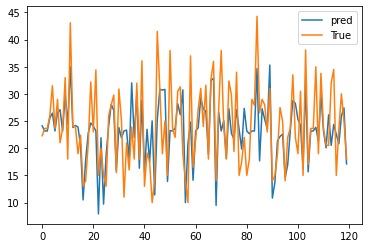

In [26]:
plt.plot(np.array(fit_train1.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true = y_test, y_pred = fit_train1.predict(x_test))
print(mse1)

32.691030658105916


In [29]:
# 중앙값으로 대체
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df2_iter = imputer.fit_transform(df2)

df2 = pd.DataFrame(df2_iter)
df2.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg']

df2

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8.0,307.0,130.0,3504.0,12.0,18.0
1,4.0,145.0,92.0,2789.5,15.5,15.0
2,8.0,318.0,150.0,3436.0,11.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,17.0
...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,27.0
394,4.0,97.0,52.0,2130.0,24.6,44.0
395,4.0,135.0,84.0,2295.0,11.6,32.0
396,4.0,120.0,79.0,2625.0,18.6,28.0


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2.drop('mpg', axis = 1),
                                                    df2['mpg'],
                                                    test_size = 0.3,
                                                    random_state = 111)

fit_train2 = sm.OLS(y_train, x_train)
fit_train2 = fit_train2.fit()

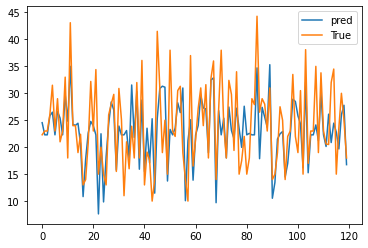

In [41]:
plt.plot(np.array(fit_train2.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_true = y_test, y_pred = fit_train2.predict(x_test))
print(mse2)

32.87693274504513


In [43]:
# 최빈값으로 대체
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df3_iter = imputer.fit_transform(df3)

df3 = pd.DataFrame(df3_iter)
df3.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'mpg']

df3

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8.0,307.0,130.0,3504.0,12.0,18.0
1,4.0,97.0,88.0,1985.0,14.5,15.0
2,8.0,318.0,150.0,3436.0,11.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,17.0
...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,27.0
394,4.0,97.0,52.0,2130.0,24.6,44.0
395,4.0,135.0,84.0,2295.0,11.6,32.0
396,4.0,120.0,79.0,2625.0,18.6,28.0


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df3.drop('mpg', axis = 1),
                                                    df3['mpg'],
                                                    test_size = 0.3,
                                                    random_state = 111)

fit_train3 = sm.OLS(y_train, x_train)
fit_train3 = fit_train3.fit()

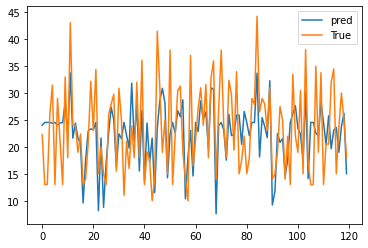

In [47]:
plt.plot(np.array(fit_train3.predict(x_test)),label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(y_true = y_test, y_pred = fit_train3.predict(x_test))
print(mse3)

46.52290967546968


In [49]:
print('평균 :', mse1)
print('중앙값 :', mse2)
print('최빈값 :', mse3)

평균 : 32.691030658105916
중앙값 : 32.87693274504513
최빈값 : 46.52290967546968
